In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Loading and Inspecting the Data

We will be working with a dataset of audiobooks downloaded from audible.in from 1998 to 2025 (pre-planned releases). [Source](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

The first thing we will do is load the raw audible data.

### Instructions:
* Using pandas, read the `audible_raw.csv` file that is located inside the `data` folder in our local directory. Assign to `audible`.
* Show the first few rows of the `audible` data frame.

In [36]:
# Load the audible_raw.csv file
audible=pd.read_csv('audible_raw.csv')
# View the first rows of the dataframe
audible.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


### 💾 The data

- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" -  The audiobook's duration, in hours and minutes.
- "releasedate" -  The date the audiobook was published.
- "language" -  The audiobook's language.
- "stars" -  The average number of stars (out of 5) and the number of ratings (if available).
- "price" -  The audiobook's price in INR (Indian Rupee).

 We can use the `.info()` method to inspect the data types of the columns

In [37]:
# Inspect the columns' data types
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84517 entries, 0 to 84516
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         84517 non-null  object
 1   author       84517 non-null  object
 2   narrator     84517 non-null  object
 3   time         84517 non-null  object
 4   releasedate  84517 non-null  object
 5   language     84517 non-null  object
 6   stars        84517 non-null  object
 7   price        84516 non-null  object
dtypes: object(8)
memory usage: 5.2+ MB


## Task 2: Clean text data in Author and Narrator columns

We will start cleaning some of the text columns like `author` and `narrator`. We can remove the `Writtenby:` and `Narratedby:` portions of the text in those columns.

For this, we will use the `.str.replace()` method

### Instructions:
* Remove 'Writtenby:' from the `author` column
* Remove 'Narratedby:' from the `narrator` column
* Check the results

In [38]:
# Remove Writtenby: from the author column
audible['author']=audible['author'].str.replace('Writtenby:',"",regex=False)
# Remove Narratedby: from the narrator column
audible['narrator']=audible['author'].str.replace('Narratedby:',"",regex=False)
# Check the results
audible.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,GeronimoStilton,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RickRiordan,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,JeffKinney,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,RickRiordan,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,RickRiordan,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


## Task 3: Extract number of stars and ratings from Stars column.

The `stars` column combines the number of stars and the number of ratins. Let's turn this into numbers and split it into two columns: `rating_stars` and `n_ratings`.

First we will use the `.sample()` method to get a glimpse at the type of entries in that column.

In [39]:
# Get a glimpse of the stars column
audible["stars"].sample(5)

50804    Not rated yet
62813    Not rated yet
71007    Not rated yet
17492    Not rated yet
67511    Not rated yet
Name: stars, dtype: object

Since there are many instances of `Not rated yet`, let's filter them out and sample again:

In [40]:
# Explore the values of the star column that are not 'Not rated yet'
audiblef=audible[~audible['stars'].str.contains("Not rated yet",na=False)]

As a first step, we can replace the instances of `Not rated yet` with `NaN`

In [41]:
# Replace 'Not rated yet' with NaN
audiblef.stars.replace('Not rated yet',np.nan)
audiblef["stars"].sample(5)

39311     4.5 out of 5 stars4 ratings
7606     4.5 out of 5 stars13 ratings
48673        5 out of 5 stars1 rating
83583     4.5 out of 5 stars7 ratings
78663        3 out of 5 stars1 rating
Name: stars, dtype: object

We can use `.str.extract()` to get the number of stars and the number of ratings into their own columns.

### Instructions:
* Extract the number of stars into the `rating_stars` column
* Extract the number of ratings into the `n_ratings` column
* Convert both new columns to float

In [42]:
# Extract number of stars into rating_stars and turn into float
audiblef['rating_stars'] = audiblef['stars'].str.extract(r'(\d\.\d)').astype(float)
# Replace comma, extract number of ratings into n_ratings and convert to float
audiblef['n_ratings'] = (
    audiblef['stars']
    .str.replace(',', '', regex=False)
    .str.extract(r'(\d+) rating')
    .astype(float)
)

# Examine the new columns
print(audiblef[['rating_stars', 'n_ratings']])


       rating_stars  n_ratings
0               NaN       34.0
1               4.5       41.0
2               4.5       38.0
3               4.5       12.0
4               4.5      181.0
...             ...        ...
84463           NaN        1.0
84466           NaN        1.0
84478           NaN        1.0
84479           NaN        2.0
84516           NaN        NaN

[14795 rows x 2 columns]


As a last step, let's delete the `stars` column using the `.drop` command:

In [43]:
# Drop the stars column
audiblef = audiblef.drop(columns='stars')
# Check the results
print(audiblef.head())

                                         name  ... n_ratings
0                  Geronimo Stilton #11 & #12  ...      34.0
1                            The Burning Maze  ...      41.0
2                                The Deep End  ...      38.0
3                        Daughter of the Deep  ...      12.0
4  The Lightning Thief: Percy Jackson, Book 1  ...     181.0

[5 rows x 9 columns]


## Task 4: Change data types

Another important step is to have our data in the correct data types

### Instructions:
* Set `price` to float
* Turn `rating_stars` to category
* Convert `releasedate` to datetime

In [44]:
# Explore the price column
# Remove commas and convert to float
# Replace the comma with ''
# Replace 'Free' with 0
# Turn price to float
# Convert to string, replace 'Free' with '0', remove commas, then convert to float
audiblef['price'] = (
    audiblef['price']
    .astype(str)
    .str.replace('Free', '0', case=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)



We need to get rid of the comma and the word 'Free' before we can convert the data.

* Turn `rating_stars` to category

Since `stars` can only take a small number of discrete values, the best data type for the column is `category`.

Let's first look at the unique values in that column to confirm:

In [45]:
# Look at the unique values in the rating_stars column
print(audiblef['rating_stars'].unique())


[nan 4.5 3.5 2.5 1.5]


We can now use `.astype` to change the data type.

In [46]:
# Turn rating_stars to category
audiblef['rating_stars'] = audiblef['rating_stars'].astype('category')


* Convert `releasedate` date to datetime

Here we will use the `to_datetime()` function to turn the dates into datetime objects:

In [47]:
audiblef['releasedate'] = pd.to_datetime(audiblef['releasedate'], errors='coerce')
print(audiblef.dtypes)
print(audiblef[['releasedate']].head())

name                    object
author                  object
narrator                object
time                    object
releasedate     datetime64[ns]
language                object
price                  float64
rating_stars          category
n_ratings              float64
dtype: object
  releasedate
0  2008-04-08
1  2018-01-05
2  2020-06-11
3  2021-05-10
4  2010-01-13


## Task 5: Extract hours and minutes from the `time` column

The `time` column combines the number of hours and minutes into one column. We want to transform and consolidate the information into a new `time_minutes` column.

In [48]:
# Explore the values in the time column
print(audiblef['time'].unique())

['2 hrs and 20 mins' '13 hrs and 8 mins' '2 hrs and 3 mins' ...
 '32 hrs and 25 mins' '23 hrs and 16 mins' '25 hrs and 18 mins']


Let's see what other ways they have encoded `min` or `minutes`:

In [49]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
# Count entries with different spellings
print("Contains 'min':", audiblef['time'].str.contains(r'\bmin\b', case=False, na=False).sum())
print("Contains 'mins':", audiblef['time'].str.contains(r'\bmins\b', case=False, na=False).sum())
print("Contains 'minutes':", audiblef['time'].str.contains(r'\bminutes\b', case=False, na=False).sum())


Contains 'min': 225
Contains 'mins': 14294
Contains 'minutes': 0


We can see that we need to fix the following:
* hr, hrs -> consolidate as `hr`
* min, mins -> consolidate as `min`
* Less than 1 minute -> round to 1 min

In [50]:
# Replace hrs, mins, and 'Less than 1 minute'

# Convert to lowercase for uniformity
audiblef['time'] = audiblef['time'].str.lower()

# Replace 'hrs' or 'hr' variations with 'hr'
audiblef['time'] = audiblef['time'].str.replace(r'\bhrs?\b', 'hr', regex=True)

# Replace 'mins' or 'minute(s)' variations with 'min'
audiblef['time'] = audiblef['time'].str.replace(r'\bmins?\b', 'min', regex=True)
audiblef['time'] = audiblef['time'].str.replace(r'\bminutes?\b', 'min', regex=True)

# Replace "less than 1 minute" with "1 min"
audiblef['time'] = audiblef['time'].str.replace(r'less than 1 min(ute)?', '1 min', regex=True)



Let's see how it looks now:

In [51]:
# Check the results
print(audiblef['time'].value_counts().head(10))


6 hr and 57 min    37
7 hr and 33 min    36
7 hr and 46 min    34
6 hr and 24 min    34
7 hr and 28 min    33
8 hr and 10 min    32
7 hr and 41 min    32
6 hr and 50 min    32
8 hr and 7 min     31
6 hr and 45 min    30
Name: time, dtype: int64


The next step is to extract the number of hours and minutes from the text, then combine in a new `time_mins` column.

### Instructions: 
* Extract the number of hours from `time`. Assign to the `hours` variable.
* Extract the number of minutes from `time`. Assign to the `mins` variable.
* Create the `time_mins` column combining hours and minutes.

In [52]:
# Extract the number of hours, turn to integer
audiblef['hours'] = audiblef['time'].str.extract(r'(\d+)\s*hr')[0].fillna(0).astype(int)

# Extract the number of minutes, turn to integer
audiblef['mins'] = audiblef['time'].str.extract(r'(\d+)\s*min')[0].fillna(0).astype(int)

# Combine hours and minutes into the time_mins column
audiblef['time_mins'] = audiblef['hours'] * 60 + audiblef['mins']

# Check the results
print(audiblef[['time', 'hours', 'mins', 'time_mins']].head(10))


               time  hours  mins  time_mins
0   2 hr and 20 min      2    20        140
1   13 hr and 8 min     13     8        788
2    2 hr and 3 min      2     3        123
3  11 hr and 16 min     11    16        676
4             10 hr     10     0        600
5  10 hr and 35 min     10    35        635
6   2 hr and 23 min      2    23        143
7  12 hr and 32 min     12    32        752
8  10 hr and 56 min     10    56        656
9  13 hr and 22 min     13    22        802


And as final step, let's delete the columns we don't need any more:

In [53]:
# Drop the time column
audiblef = audiblef.drop(columns='time')


Here is how our dataframe looks now:

In [54]:
# Inspect the dataframe 
audiblef.head()

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,hours,mins,time_mins
0,Geronimo Stilton #11 & #12,GeronimoStilton,GeronimoStilton,2008-04-08,English,468.0,NaN,34.0,2,20,140
1,The Burning Maze,RickRiordan,RickRiordan,2018-01-05,English,820.0,4.5,41.0,13,8,788
2,The Deep End,JeffKinney,JeffKinney,2020-06-11,English,410.0,4.5,38.0,2,3,123
3,Daughter of the Deep,RickRiordan,RickRiordan,2021-05-10,English,615.0,4.5,12.0,11,16,676
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,RickRiordan,2010-01-13,English,820.0,4.5,181.0,10,0,600


## Task 6: Check data ranges

Another important step is to confirm that the values in our columns are in the expected ranges and that we don't have out-of-range values.

Let's create a histogram of the numeric columns to visually inspect ht ranges and the shape of the distribution:

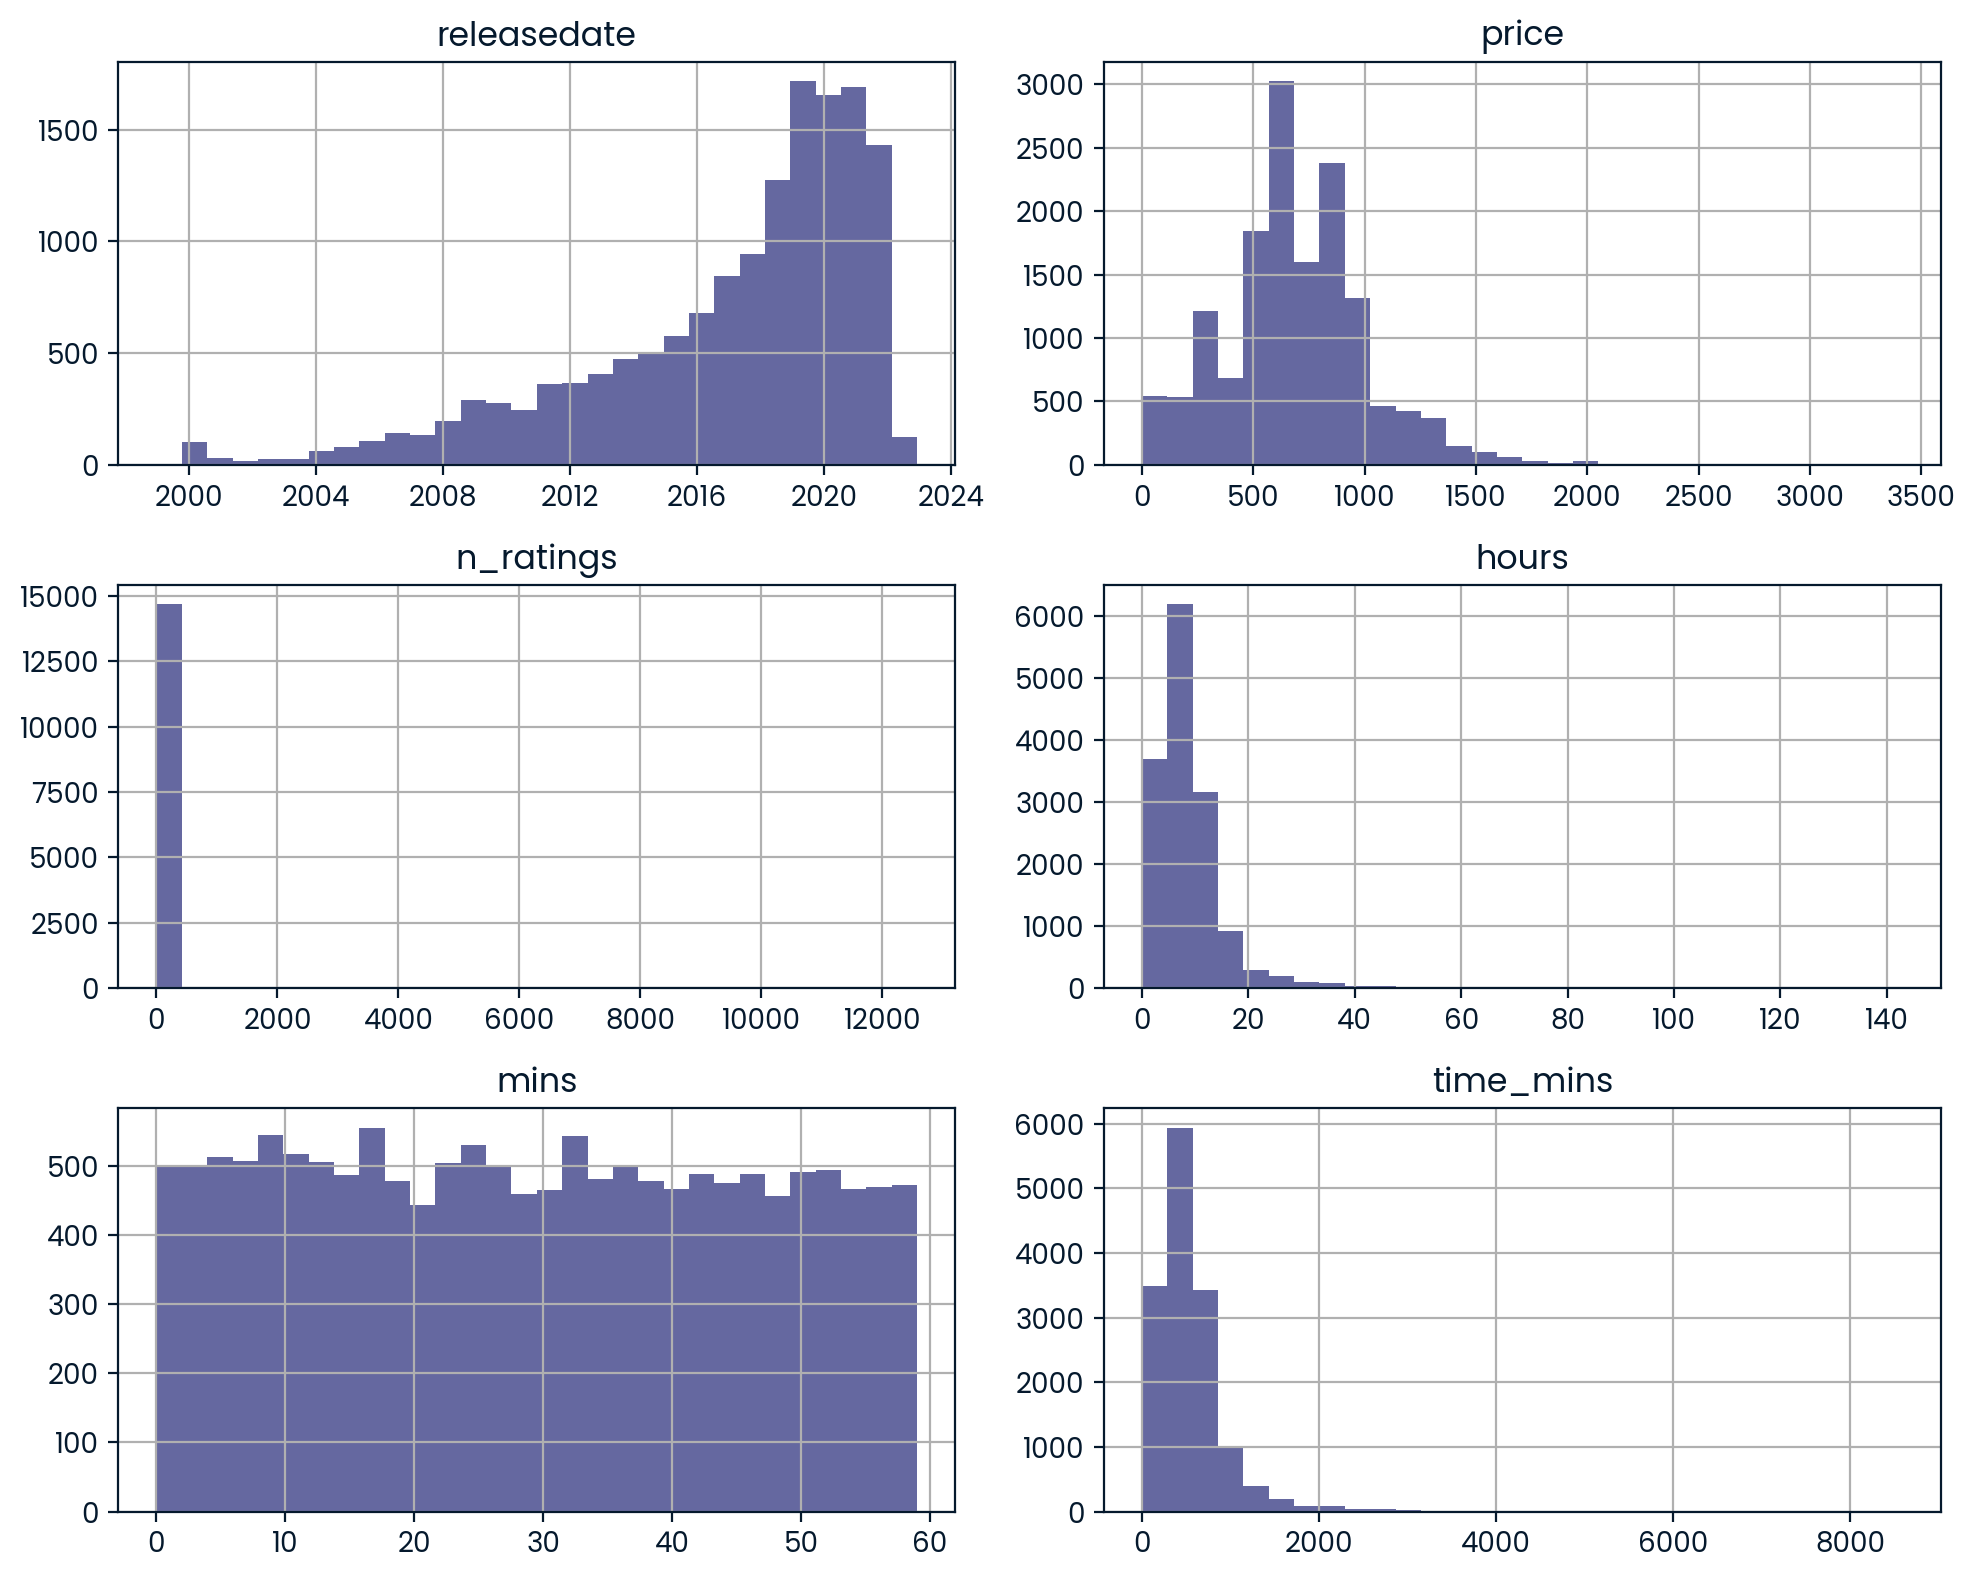

In [55]:

import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
audiblef.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()


Additionally, we can use `.describe()` to look at a summary of our data

In [56]:
# Look at the numeric columns
audiblef.describe()


,price,n_ratings,hours,mins,time_mins
count,14794.000000,14794.000000,14795.000000,14795.000000,14795.000000
mean,688.316878,21.940043,8.666171,29.049882,549.020142
std,326.744391,209.402397,7.484093,17.315436,448.796238
min,0.000000,1.000000,0.000000,0.000000,1.000000
25%,500.000000,1.000000,5.000000,14.000000,300.000000
50%,668.000000,2.000000,7.000000,29.000000,474.000000
75%,879.000000,7.000000,11.000000,44.000000,672.000000
max,3416.000000,12573.000000,143.000000,59.000000,8595.000000


In [57]:
# Look at the non numeric columns
audiblef.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,14795,14795,14795,14795,14795,4446.0
unique,14206,9383,9383,3487,13,4.0
top,The Prophet,P.G.Wodehouse,P.G.Wodehouse,2020-03-31 00:00:00,English,4.5
freq,10,60,60,57,14320,3989.0
first,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2022-12-03 00:00:00,NaN,NaN


We will transform the prices in `price` to USD for this exercise. We can use the exchange rate of 1 USD = 0.012 INR:

In [58]:
# Transform prices to USD (multiply times 0.012)

audiblef['price'] = (audiblef['price'] * 0.012).round(2)

# Check the updated dataframe
print(audiblef[['price']].head(10))




   price
0   5.62
1   9.84
2   4.92
3   7.38
4   9.84
5   7.87
6   2.80
7   9.84
8  15.07
9   9.84


There values in the `language` column have different capitalization. Let's fix that.

In [59]:
# Inspect the language column before making changes
print(audiblef['language'].value_counts())


English    14320
Hindi        317
tamil         83
german        36
urdu          16
spanish        7
french         5
italian        4
danish         3
swedish        1
polish         1
russian        1
arabic         1
Name: language, dtype: int64


In [60]:
# Update capitalization in the language column
# Standardize capitalization
audiblef['language'] = audiblef['language'].str.title()

# Check the results
print(audiblef['language'].value_counts())


English    14320
Hindi        317
Tamil         83
German        36
Urdu          16
Spanish        7
French         5
Italian        4
Danish         3
Swedish        1
Polish         1
Russian        1
Arabic         1
Name: language, dtype: int64


## Task 7: Checking for duplicates

How many duplicates do we have?

As a first step look for duplicates using `.duplicated()` and `.sum()`:

In [61]:
# Look for duplicate rows
duplicate_count = audiblef.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


It is useful to look for duplicates only using a subset of the columns that make sense. We will use the following subset of columns:
* name
* author
* narrator
* time_mins
* price

Here we use `.duplicated()` again, but with our subset of columns.

In [62]:
# Create a list of our subset columns and assign to subset_cols
# Subset columns
subset_cols = ['name', 'author', 'narrator', 'time_mins', 'price']

# Check for duplicates using our subset of columns
# Count duplicates based on the subset
duplicate_subset_count = audiblef.duplicated(subset=subset_cols).sum()
print("Number of duplicate rows based on subset:", duplicate_subset_count)


Number of duplicate rows based on subset: 39


Let's look at those values (use `keep=false`) and see what is going on:

In [63]:
# Check the duplicated rows keeping the duplicates and order by the name column
# Get all duplicates based on subset columns (including originals)
duplicates_all = audiblef[audiblef.duplicated(subset=subset_cols, keep=False)]

# Sort by 'name' for easier inspection
duplicates_all = duplicates_all.sort_values(by='name')

# Display the result
print(duplicates_all)


                                              name  ... time_mins
62272                                Atomic Habits  ...       335
35942                                Atomic Habits  ...       335
41111              Aurangzeb: The Man and the Myth  ...       230
20257              Aurangzeb: The Man and the Myth  ...       230
62305                        Becoming Supernatural  ...       846
...                                            ...  ...       ...
33922  What I Talk About When I Talk About Running  ...       263
38021                   When Women Ruled the World  ...       555
20260                   When Women Ruled the World  ...       555
64428                                Wings of Fire  ...        75
22158                                Wings of Fire  ...        75

[78 rows x 11 columns]


We can see that the duplicates are for files with different release dates. We can decide to keep the record with the last release date.

We will can use the `drop_duplicates()` method with the same subset and using `keep=last` to keep the last release date

In [64]:
# Drop duplicated rows keeping the last release date
audiblef = audiblef.drop_duplicates(subset=subset_cols, keep='last')


We can check again for duplicates:

In [65]:
# Check again for duplicates using our subset of columns
duplicate_subset_count_after = audiblef.duplicated(subset=subset_cols).sum()
print("Number of duplicate rows after cleanup:", duplicate_subset_count_after)


Number of duplicate rows after cleanup: 0


## Task 8: Dealing with missing data

Before we finish, let's take a look at missing data in our columns. We can use the `.isna()` method and chain it with `.sum()` to get the total:

In [66]:
# Check for null values
# Count missing values per column
missing_counts = audiblef.isna().sum()
print(missing_counts)


name                0
author              0
narrator            0
releasedate         0
language            0
price               1
rating_stars    10337
n_ratings           1
hours               0
mins                0
time_mins           0
dtype: int64


We could turn the **NaN** values to 0 or another numeric value, or we could keep them. It depends on our use case.

If we want to plot the ratings distribution, it can make sense to drop audiobooks with no ratings. But if we need to use the distribution of prices for our analysis, then removing audiobooks with no ratings will bias our results (since unrated audiobooks are likely more niche and might have a different pricing structure than rated audiobooks).

We will keep the unrated audiobooks for now.

## Task 9: Save the cleaned data set

We can use the `.to_csv` method to save the clean file. We include `index=False` so that we don't also copy the current index to our destination file.

In [67]:
# Save the dataframe to a new file: 'audible_clean.csv'

audiblef.to_csv('audible_clean.csv', index=False)
